In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

Funny story: my mother-in-law was going to move her business into a mall, but she didn't know if it was a good idea (given the current state of the mall). She didn't have any research to go off of, but the Sears closed and it was pretty much a sign to NOT invest.

In [3]:
df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

Do a lil' explorin': wanting to see the general data available and the types

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


I figured I should make the customer ID the index? Yes yes.

In [6]:
df.set_index('CustomerID')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


I wanted to see the differences between the distribution of age and income, so distplot!

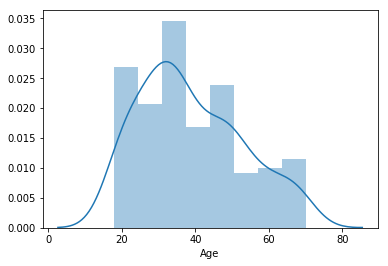

In [7]:
sns.distplot(df['Age'])

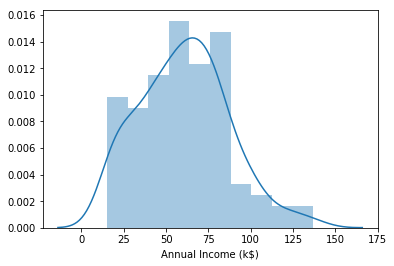

In [8]:
sns.distplot(df['Annual Income (k$)'])

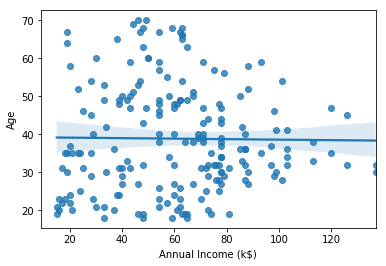

In [9]:
sns.regplot(x='Annual Income (k$)', y='Age', data=df)

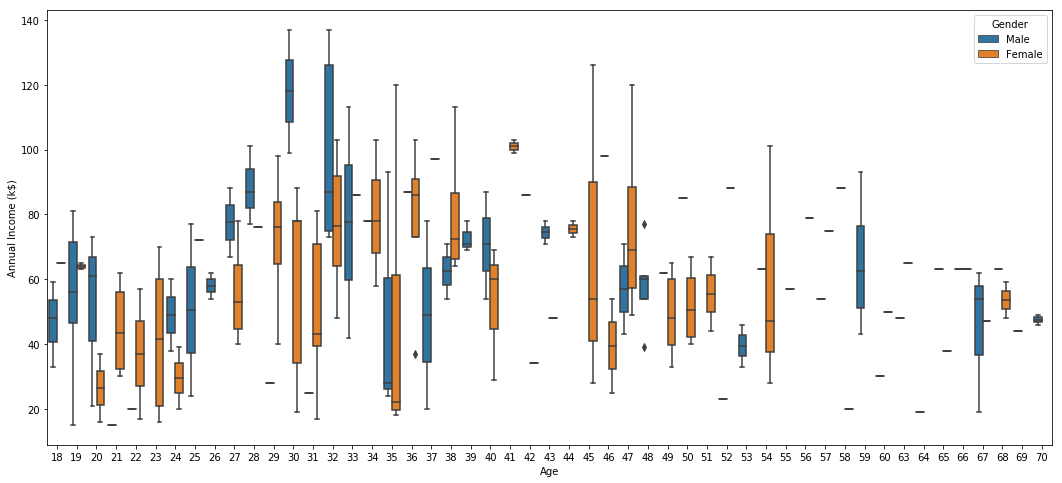

In [10]:
dim = (18, 8)
fig, ax = plt.subplots(figsize=dim)
sns.boxplot(x='Age', y='Annual Income (k$)', data=df, hue='Gender', ax=ax)

Methinks I should look for a relationship between age and spending score? Let's try it!

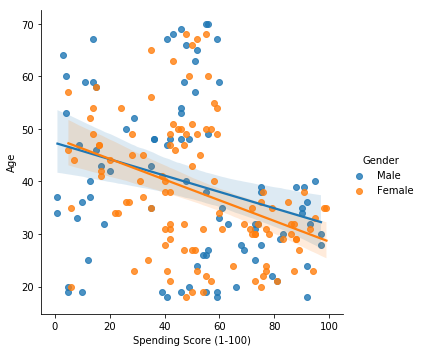

In [11]:
sns.lmplot(x='Spending Score (1-100)', y='Age', hue='Gender', data=df)

Making a dictionary for age groups based on age ranges (if I had a birthdate, I'd do it by generation but I don't).

In [12]:
d1 = {range(10, 20): 'Teens',
     range(20, 30): 'Twenties',
     range(30, 40): 'Thirties',
     range(40, 50): 'Forties',
     range(50, 60): 'Fifties',
     range(60, 70): 'Sixties',
     range(70, 80): 'Seventies'}

In [13]:
df['Age Group'] = df['Age'].apply(lambda x: next((v for k, v in d1.items() if x in k), 0))

In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group
0,1,Male,19,15,39,Teens
1,2,Male,21,15,81,Twenties
2,3,Female,20,16,6,Twenties
3,4,Female,23,16,77,Twenties
4,5,Female,31,17,40,Thirties


Methinks I want to see the average income by age group...

In [15]:
df.groupby(['Age Group','Gender'])['Annual Income (k$)'].mean()

Age Group  Gender
Fifties    Female    58.142857
           Male      59.363636
Forties    Female    61.750000
           Male      67.466667
Seventies  Male      47.500000
Sixties    Female    52.500000
           Male      46.500000
Teens      Female    64.333333
           Male      52.000000
Thirties   Female    66.243243
           Male      76.250000
Twenties   Female    49.076923
           Male      56.058824
Name: Annual Income (k$), dtype: float64